In [178]:
import pandas as pd
from sklearn import tree,model_selection,metrics,neighbors,linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [153]:
diabetes_data = pd.read_csv('diabetes.csv')

In [154]:
diabetes_data.shape

(768, 9)

In [159]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [157]:
def clean_data(data):
    data.loc[data['Glucose']==0,'Glucose'] = data.Glucose.mean()
    data.loc[data['BloodPressure']==0,'BloodPressure'] = data.BloodPressure.mean()
    data.loc[data['SkinThickness']==0,'SkinThickness'] = data.SkinThickness.median()
    data.loc[data['Insulin']==0,'Insulin'] = data.Insulin.median()
    data.loc[data['BMI']==0,'BMI'] = data.BMI.median()

clean_data(diabetes_data)

In [158]:
diabetes_data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [160]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


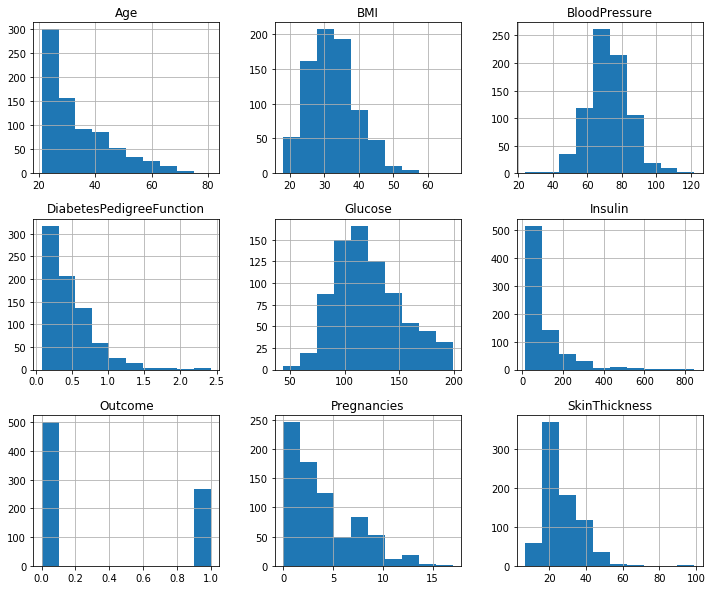

In [177]:
diabetes_data.hist(figsize=(12,10))
plt.show()

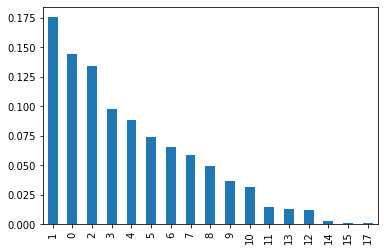

In [161]:
# value counts in Pregnancy column (normalized)
diabetes_data['Pregnancies'].value_counts(normalize=True).plot(kind='bar')

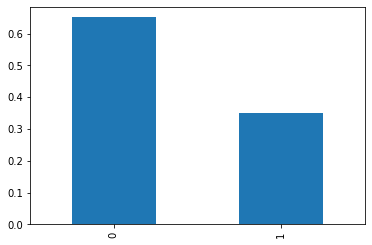

In [136]:
# Plotting the Outcome column that shows if the person has diabetes or not
diabetes_data.Outcome.value_counts(normalize=True).plot(kind='bar')

The chart shows that around 65% of people surveyed do not have diabetes

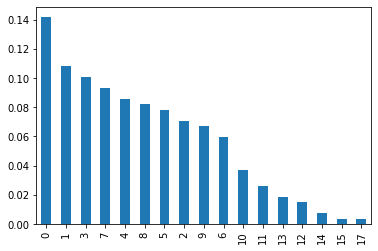

In [137]:
diabetes_data.Pregnancies[diabetes_data.Outcome==1].value_counts(normalize=True).plot(kind='bar')

In [138]:
preg_values = set(diabetes_data.Pregnancies.values)

Pregnancies = 0 , n = 111


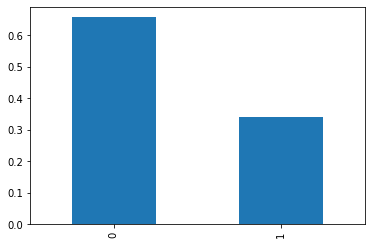

Pregnancies = 1 , n = 135


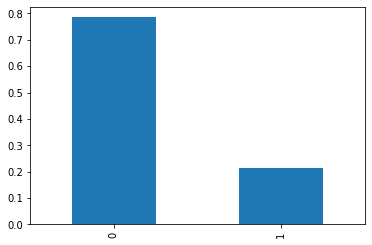

Pregnancies = 2 , n = 103


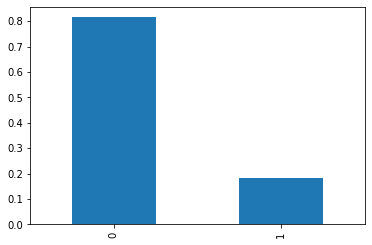

Pregnancies = 3 , n = 75


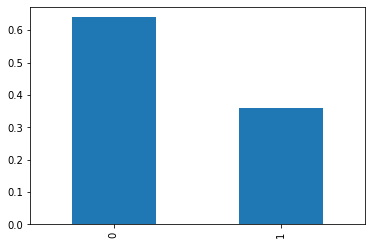

Pregnancies = 4 , n = 68


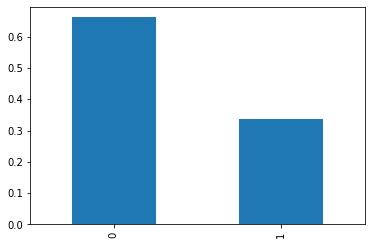

Pregnancies = 5 , n = 57


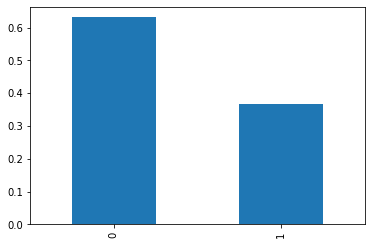

Pregnancies = 6 , n = 50


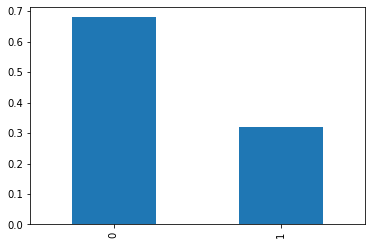

Pregnancies = 7 , n = 45


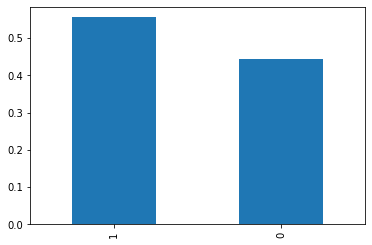

Pregnancies = 8 , n = 38


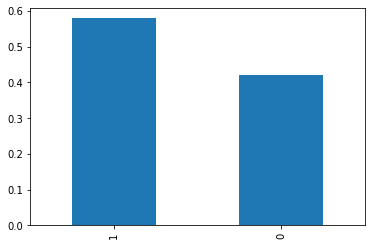

Pregnancies = 9 , n = 28


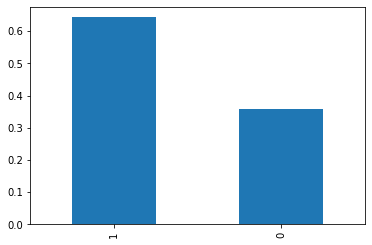

Pregnancies = 10 , n = 24


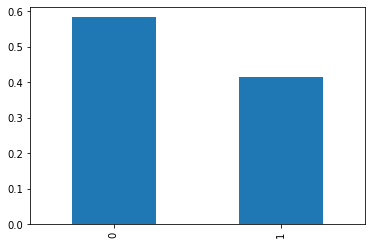

Pregnancies = 11 , n = 11


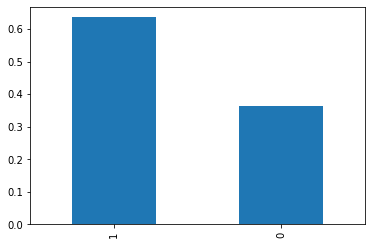

Pregnancies = 12 , n = 9


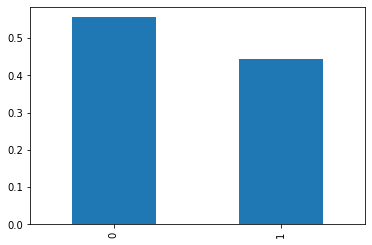

Pregnancies = 13 , n = 10


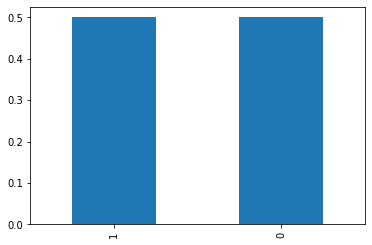

Pregnancies = 14 , n = 2


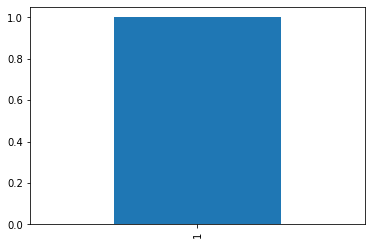

Pregnancies = 15 , n = 1


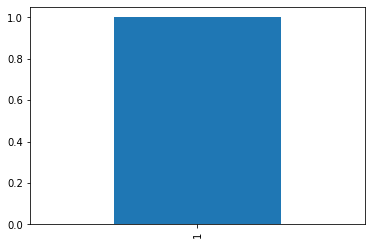

Pregnancies = 17 , n = 1


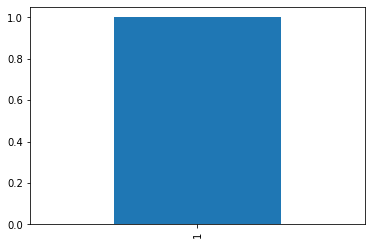

In [80]:
for x in preg_values:
    diabetes_data.Outcome[diabetes_data.Pregnancies == x].value_counts(normalize=True).plot(kind='bar')
    print('Pregnancies =',x,', n =',(diabetes_data.Pregnancies == x).sum())
    plt.show()

Charts showing diabetes relating to Pregnancy.
hyp: people with high pregnancy count show a higher chance of diabetes

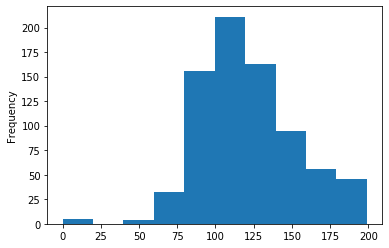

In [87]:
diabetes_data['Glucose'].plot(kind = 'hist')

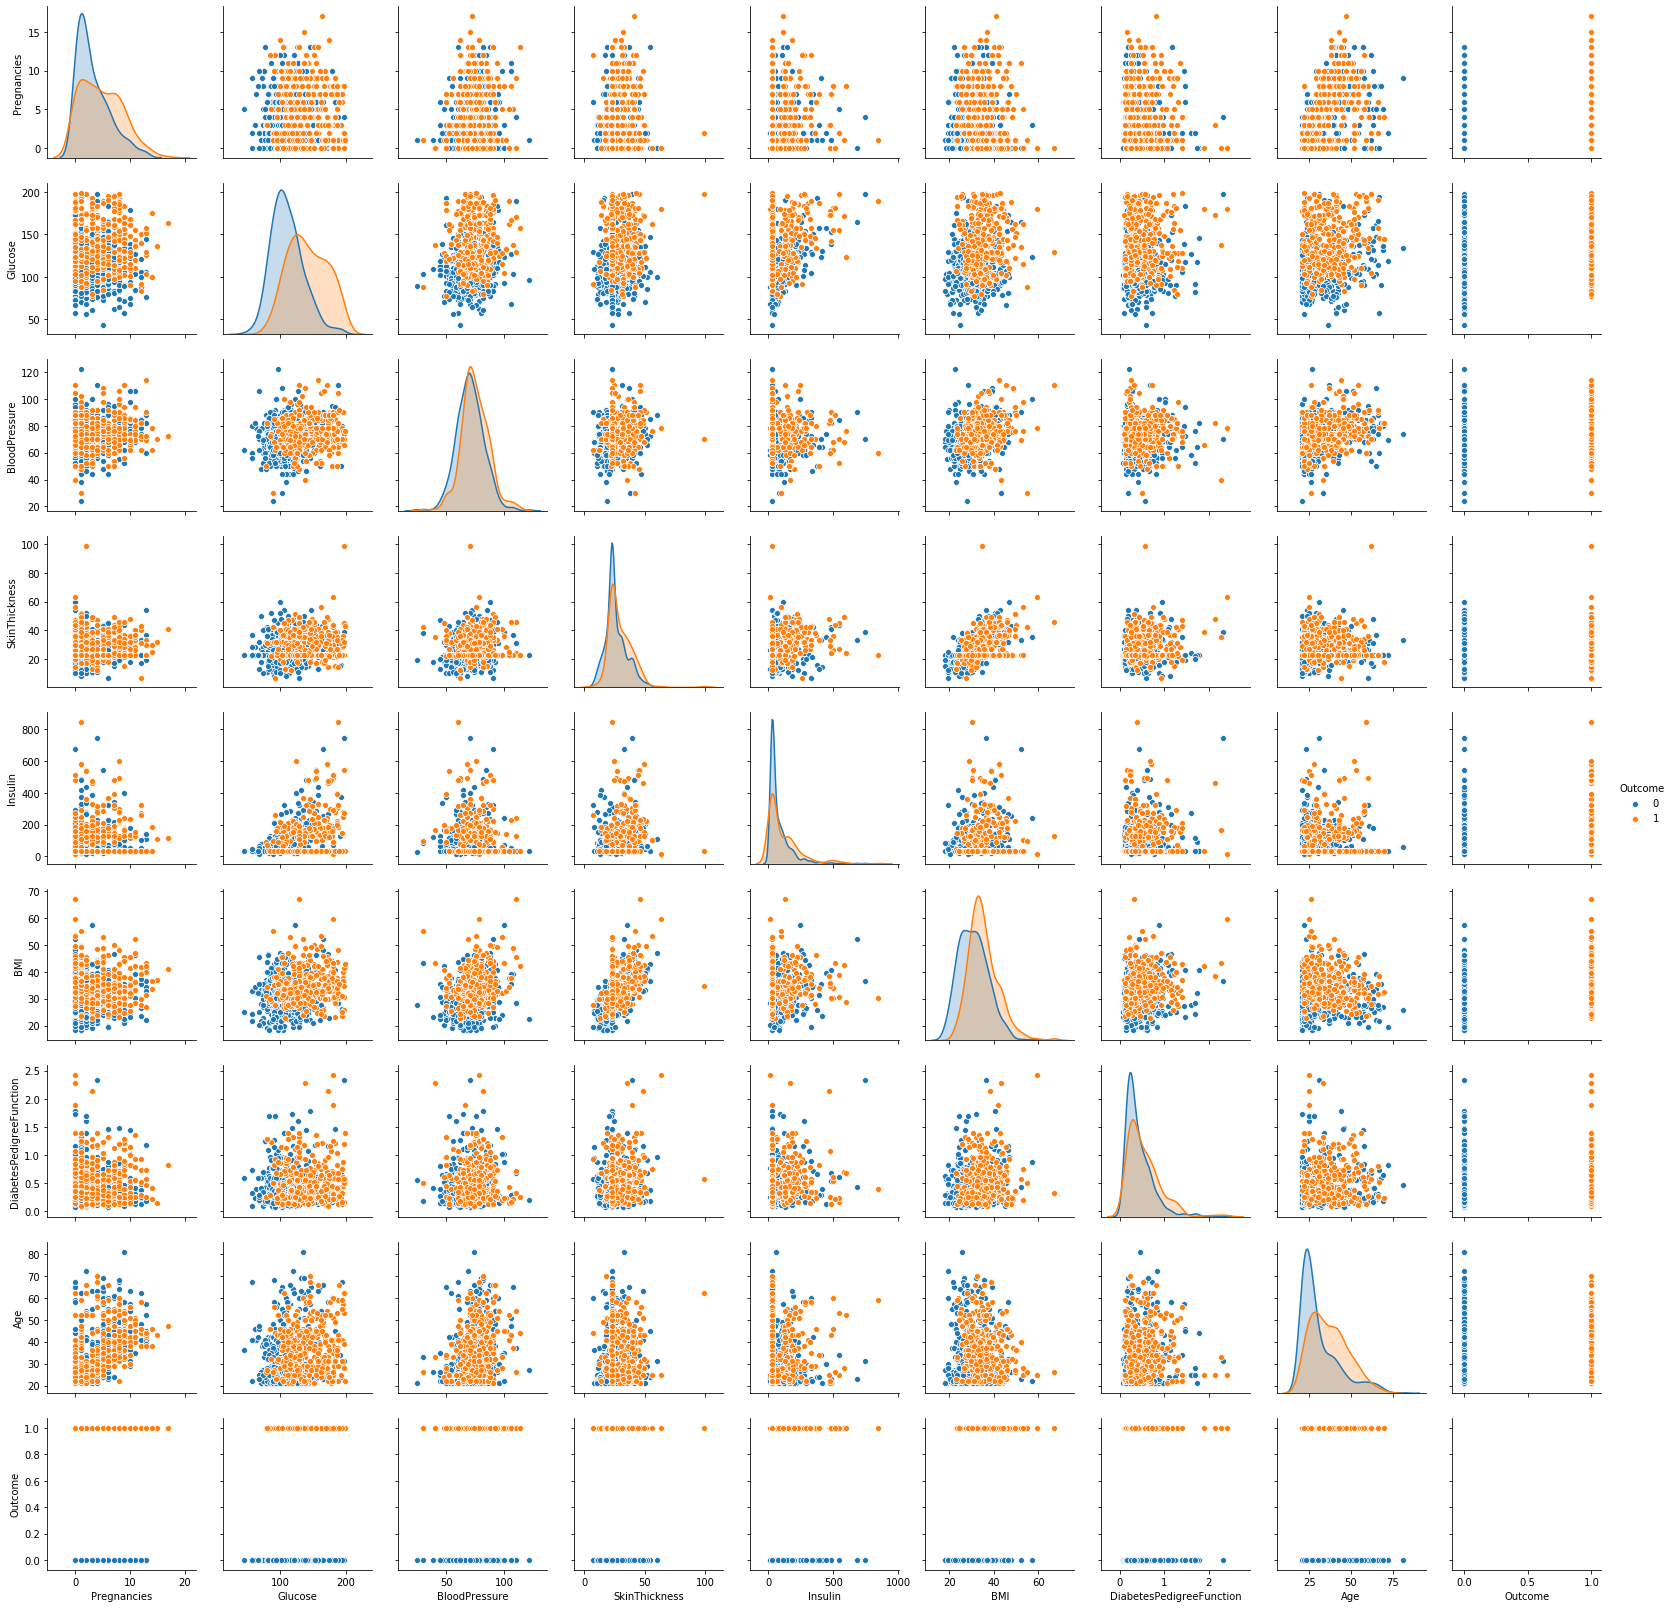

In [179]:
sns.pairplot(diabetes_data,hue='Outcome')

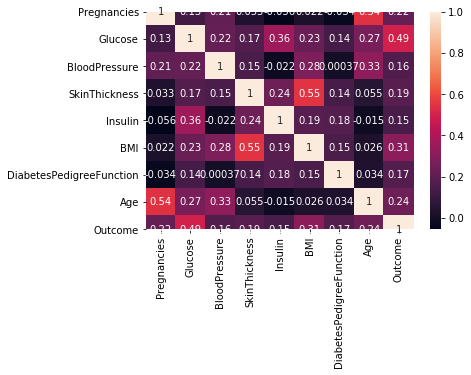

In [183]:
sns.heatmap(diabetes_data.corr(),annot=True)
plt.show()


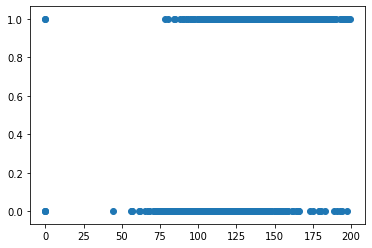

In [98]:
plt.scatter(diabetes_data.Glucose,diabetes_data.Outcome)

# ML

In [162]:
X = diabetes_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y = diabetes_data.Outcome

In [163]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.33,random_state = 4)

Logistic Regression

In [164]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
log_pred = log_reg.predict(X_test)

In [166]:
metrics.accuracy_score(y_test,log_pred)

0.8228346456692913

KNN

In [167]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [168]:
knn_pred = knn.predict(X_test)

In [169]:
metrics.accuracy_score(y_test,knn_pred)

0.7519685039370079

decision tree

In [170]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [171]:
tree_pred = decision_tree.predict(X_test)

In [172]:
metrics.accuracy_score(y_test,tree_pred)

0.7362204724409449

In [173]:
scoreList = []
for i in [log_reg,knn,decision_tree]:
    score = model_selection.cross_val_score(i,X,y,scoring='accuracy',cv=50)
    scoreList.append(score.mean())

In [174]:
scoreList

[0.7635833333333334, 0.718, 0.6981666666666666]

In [186]:
x = diabetes_data[diabetes_data.columns[:8]]

pd.Series(decision_tree.feature_importances_,index=X.columns).sort_values(ascending=False)

Glucose                     0.288358
BMI                         0.220396
Age                         0.131314
DiabetesPedigreeFunction    0.107627
BloodPressure               0.096364
SkinThickness               0.058330
Insulin                     0.050312
Pregnancies                 0.047298
dtype: float64

Conclusion: 
The data shows the strongest correlation with diabetes is the Glucose levels followed by BMI followed by Age.